<a href="https://colab.research.google.com/github/AylinNaebzadeh/MultiLabel-Text-Classification/blob/main/Mental_Health_Topic_Classification_S4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main Source:

https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

The link for downloading Glove word embeddings:

https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt/

In [1]:
!pip install keras

In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("primate_data.csv")

In [ ]:
train_data.shape

(2003, 11)

In [ ]:
train_data.head()

,post_title,post_text,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",1,0.0,1,1,0,0.0,0.0,0.0,0
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,1,1.0,0,0,1,0.0,0.0,0.0,0
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,1,1.0,1,1,0,0.0,1.0,0.0,0
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",1,1.0,0,0,0,0.0,1.0,0.0,0
4,I've been feeling this way for some tine,I'm alway feeling like this. It doesn't even m...,1,1.0,0,0,0,0.0,0.0,0.0,0


In [4]:
filter = (train_data["post_text"] != "") & (train_data["post_text"].notnull())
train_data = train_data[filter]
train_data = train_data.dropna()

In [ ]:
train_data.shape

(1997, 11)

In [5]:
posts_labels = train_data[["Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down",
                           "Feeling-down-depressed-or-hopeless",
                           "Feeling-tired-or-having-little-energy",
                           "Little-interest-or-pleasure-in-doing ",
                           "Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual",
                           "Poor-appetite-or-overeating",
                           "Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way",
                           "Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television",
                           "Trouble-falling-or-staying-asleep-or-sleeping-too-much"]]


In [ ]:
posts_labels.head()

,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much
0,1,0.0,1,1,0,0.0,0.0,0.0,0
1,1,1.0,0,0,1,0.0,0.0,0.0,0
2,1,1.0,1,1,0,0.0,1.0,0.0,0
3,1,1.0,0,0,0,0.0,1.0,0.0,0
4,1,1.0,0,0,0,0.0,0.0,0.0,0


<Axes: >

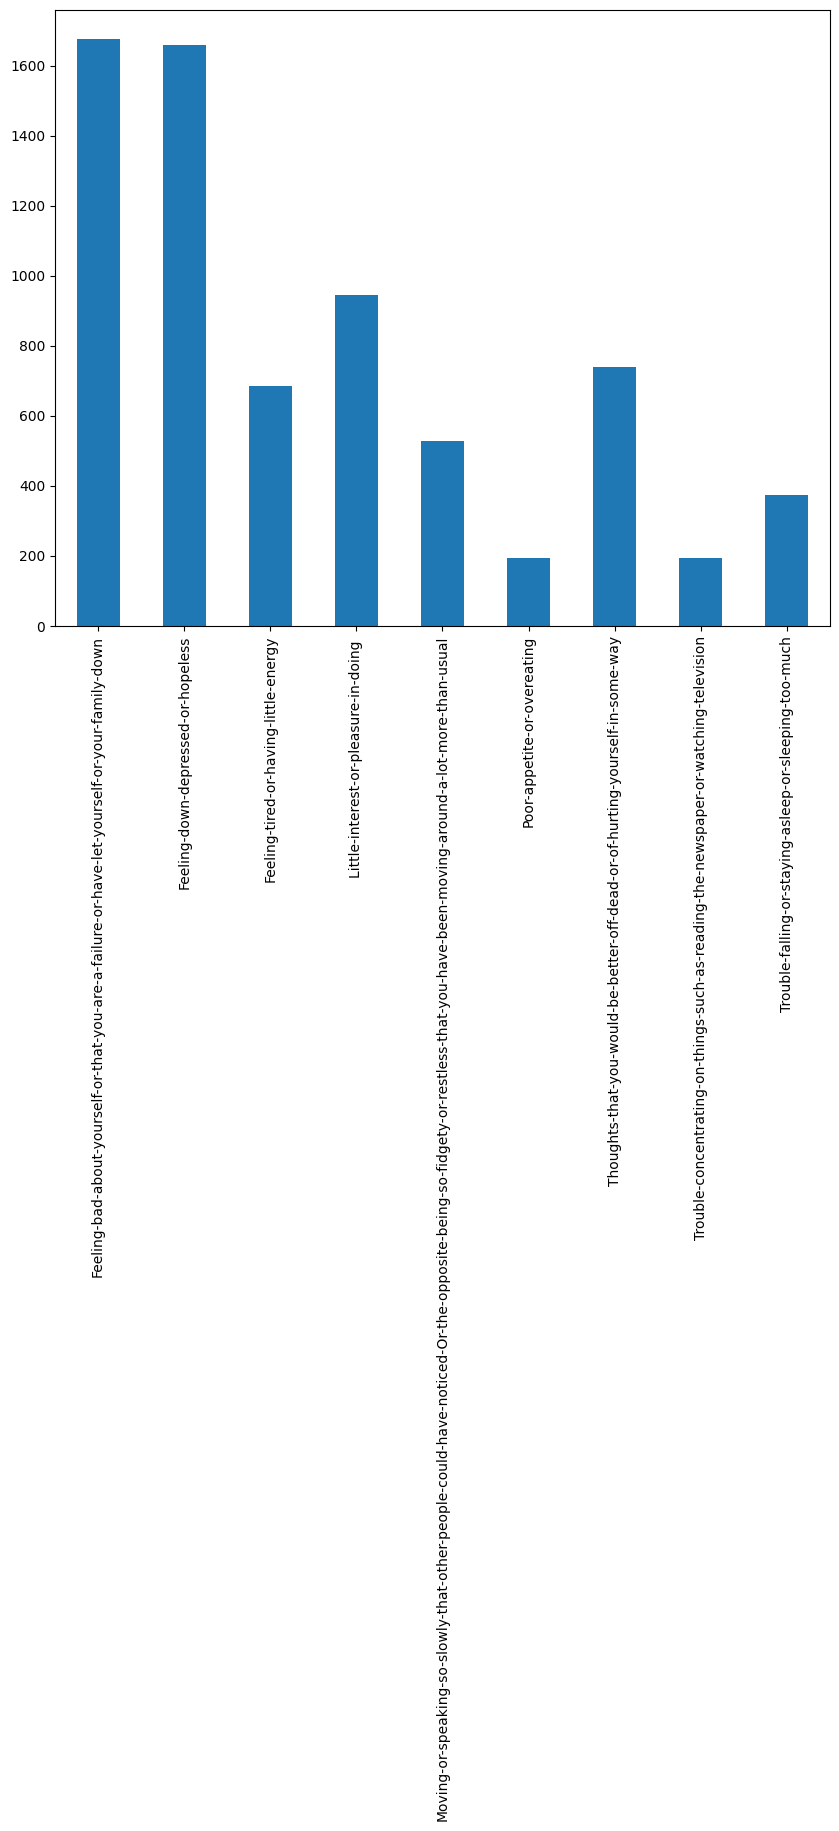

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

posts_labels.sum(axis=0).plot.bar()

# Creating Multi-label Text Classification Models

There are two ways to create multi-label classification models: using a single dense output layer and using multiple dense output layers.

In the first approach, we can use a single dense layer with six outputs with sigmoid activation functions and binary cross entropy loss functions. Each neuron in the output dense layer will represent one of the six output labels. The sigmoid activation function will return a value between 0 and 1 for each neuron. If any neuron's output value is greater than 0.5, it is assumed that the comment belongs to the class represented by that particular neuron.

In the second approach we will create one dense output layer for each label. We will have a total of 6 dense layers in the output. Each layer will have its own sigmoid function.

# Multi-label Text Classification Model with Single Output Layer

In this section, we will create a multi-label text classification model with a single output layer. As always, the first step in the text classification model is to create a function responsible for cleaning the text.

In [6]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [7]:
X = []
sentences = list(train_data["post_text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = posts_labels.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

For word embeddings:

https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/

In [9]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [10]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [11]:
embeddings_dictionary = dict()

# this part must be modified 👇
glove_file = open('/content/drive/MyDrive/Glove_Word_Embeddings/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

The following script creates the model. Our model will have one input layer, one embedding layer, one LSTM layer with 128 neurons and one output layer with 9 neurons since we have 9 labels in the output.

In [12]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(9, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          1132700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 9)                 1161      
                                                                 
Total params: 1251109 (4.77 MB)
Trainable params: 118409 (462.54 KB)
Non-trainable params: 1132700 (4.32 MB)
_________________________________________________________________
None


In [14]:
from keras.utils import plot_model

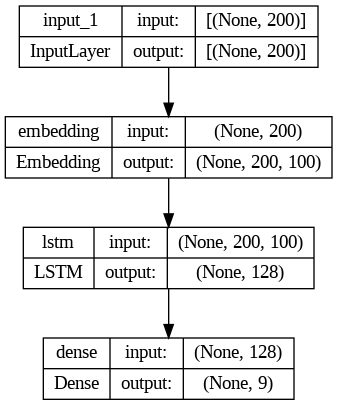

In [15]:
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [16]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
10/10 [==============================] - 11s 656ms/step - loss: 0.6322 - acc: 0.2733 - val_loss: 0.5625 - val_acc: 0.4875
Epoch 2/5
10/10 [==============================] - 8s 808ms/step - loss: 0.5154 - acc: 0.6946 - val_loss: 0.5332 - val_acc: 0.7906
Epoch 3/5
10/10 [==============================] - 6s 608ms/step - loss: 0.5015 - acc: 0.7792 - val_loss: 0.5276 - val_acc: 0.6562
Epoch 4/5
10/10 [==============================] - 8s 834ms/step - loss: 0.4987 - acc: 0.4323 - val_loss: 0.5276 - val_acc: 0.5625
Epoch 5/5
10/10 [==============================] - 6s 601ms/step - loss: 0.4965 - acc: 0.7165 - val_loss: 0.5276 - val_acc: 0.7406


In [17]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

13/13 [==============================] - 1s 91ms/step - loss: 0.5024 - acc: 0.7900
Test Score: 0.5024213194847107
Test Accuracy: 0.7900000214576721


In [18]:
import matplotlib.pyplot as plt


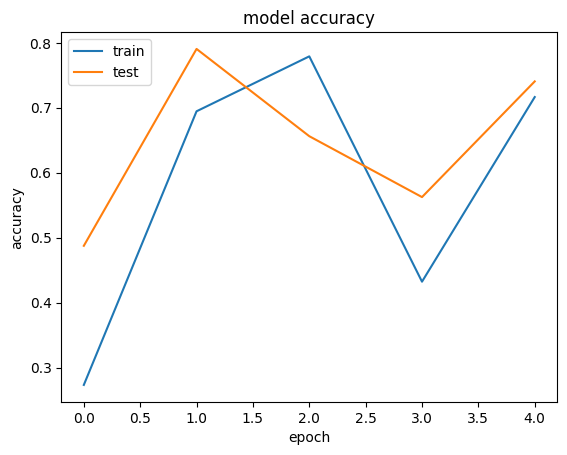

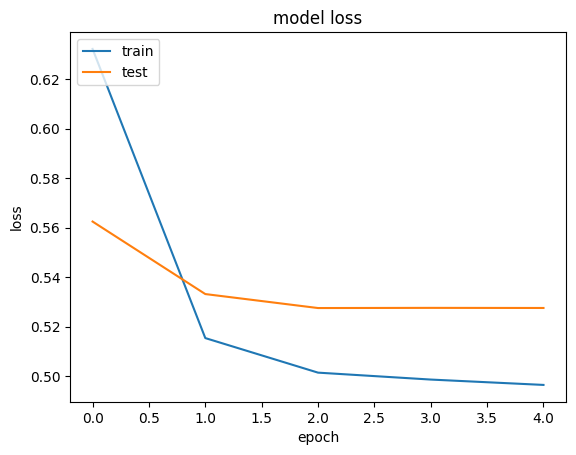

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Multi-label Text Classification Model with Multiple Output Layers

In this section we will create a multi-label text classification model where each output label will have a dedicated output dense layer. Let's first define our preprocessing function:

In [20]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [21]:
X = []
sentences = list(train_data["post_text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = train_data[["Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down",
                "Feeling-down-depressed-or-hopeless",
                "Feeling-tired-or-having-little-energy",
                "Little-interest-or-pleasure-in-doing ",
                "Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual",
                "Poor-appetite-or-overeating",
                "Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way",
                "Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television",
                "Trouble-falling-or-staying-asleep-or-sleeping-too-much"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
# 1st output
y1_train = y_train[["Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down"]].values
y1_test =  y_test[["Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down"]].values

# 2nd output
y2_train = y_train[["Feeling-down-depressed-or-hopeless"]].values
y2_test =  y_test[["Feeling-down-depressed-or-hopeless"]].values

# 3rd output
y3_train = y_train[["Feeling-tired-or-having-little-energy"]].values
y3_test =  y_test[["Feeling-tired-or-having-little-energy"]].values

# 4th output
y4_train = y_train[["Little-interest-or-pleasure-in-doing "]].values
y4_test =  y_test[["Little-interest-or-pleasure-in-doing "]].values

# 5th output
y5_train = y_train[["Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual"]].values
y5_test =  y_test[["Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual"]].values

# 6th output
y6_train = y_train[["Poor-appetite-or-overeating"]].values
y6_test =  y_test[["Poor-appetite-or-overeating"]].values

# 7th output
y7_train = y_train[["Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way"]].values
y7_test =  y_test[["Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way"]].values

# 8th output
y8_train = y_train[["Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television"]].values
y8_test =  y_test[["Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television"]].values

# 9th output
y9_train = y_train[["Trouble-falling-or-staying-asleep-or-sleeping-too-much"]].values
y9_test =  y_test[["Trouble-falling-or-staying-asleep-or-sleeping-too-much"]].values

In [24]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [25]:
glove_file = open('/content/drive/MyDrive/Glove_Word_Embeddings/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Now is the time to create our model. Our model will have one input layer, one embedding layer followed by one LSTM layer with 128 neurons. The output from the LSTM layer will be used as the input to the 6 dense output layers. Each output layer will have 1 neuron with sigmoid activation function. Each output will predict integer value between 1 and 0 for the corresponding label.

In [26]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output7 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output8 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output9 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6, output7, output8, output9])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [27]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 200, 100)             1132700   ['input_2[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128)                  117248    ['embedding_1[0][0]']         
                                                                                                  
 dense_1 (Dense)             (None, 1)                    129       ['lstm_1[0][0]']              
                                                                                            

In [28]:
from keras.utils import plot_model

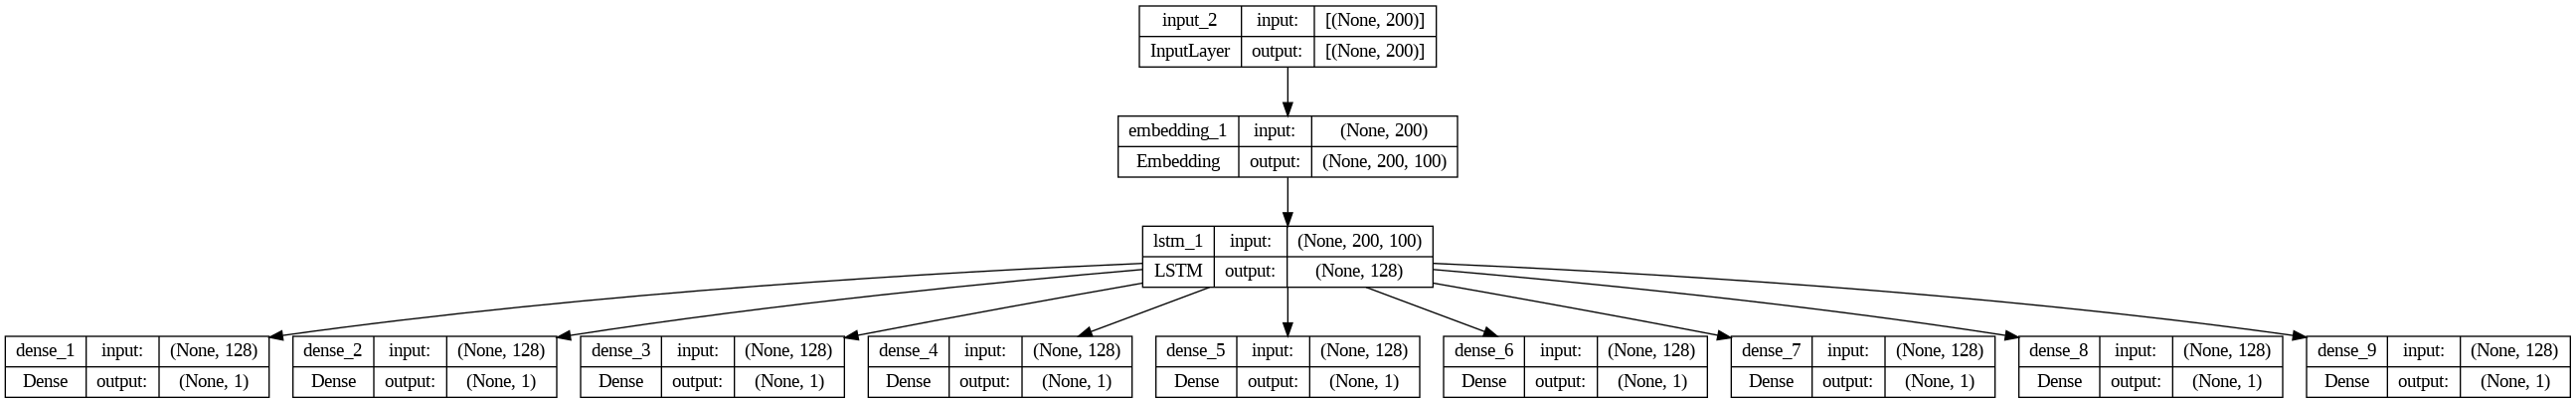

In [29]:
plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

In [30]:
history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train], batch_size=8192, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
1/1 [==============================] - 15s 15s/step - loss: 6.2340 - dense_1_loss: 0.7278 - dense_2_loss: 0.6490 - dense_3_loss: 0.6875 - dense_4_loss: 0.6932 - dense_5_loss: 0.7016 - dense_6_loss: 0.7068 - dense_7_loss: 0.6934 - dense_8_loss: 0.6763 - dense_9_loss: 0.6982 - dense_1_acc: 0.2655 - dense_2_acc: 0.5865 - dense_3_acc: 0.5936 - dense_4_acc: 0.5435 - dense_5_acc: 0.6460 - dense_6_acc: 0.6648 - dense_7_acc: 0.5959 - dense_8_acc: 0.8128 - dense_9_acc: 0.5294 - val_loss: 6.0364 - val_dense_1_loss: 0.6684 - val_dense_2_loss: 0.6256 - val_dense_3_loss: 0.6841 - val_dense_4_loss: 0.6948 - val_dense_5_loss: 0.6870 - val_dense_6_loss: 0.6451 - val_dense_7_loss: 0.6900 - val_dense_8_loss: 0.6639 - val_dense_9_loss: 0.6774 - val_dense_1_acc: 0.8000 - val_dense_2_acc: 0.8062 - val_dense_3_acc: 0.6594 - val_dense_4_acc: 0.5375 - val_dense_5_acc: 0.6625 - val_dense_6_acc: 0.8906 - val_dense_7_acc: 0.5938 - val_dense_8_acc: 0.8969 - val_dense_9_acc: 0.7812
Epoch 2/5
1/1 [=======

In [31]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test], verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

13/13 [==============================] - 1s 94ms/step - loss: 5.5656 - dense_1_loss: 0.5459 - dense_2_loss: 0.5442 - dense_3_loss: 0.6767 - dense_4_loss: 0.7006 - dense_5_loss: 0.6584 - dense_6_loss: 0.5391 - dense_7_loss: 0.6964 - dense_8_loss: 0.5999 - dense_9_loss: 0.6045 - dense_1_acc: 0.8450 - dense_2_acc: 0.8475 - dense_3_acc: 0.6525 - dense_4_acc: 0.5225 - dense_5_acc: 0.7575 - dense_6_acc: 0.9075 - dense_7_acc: 0.5975 - dense_8_acc: 0.8950 - dense_9_acc: 0.8125
Test Score: 5.565590858459473
Test Accuracy: 0.545911431312561


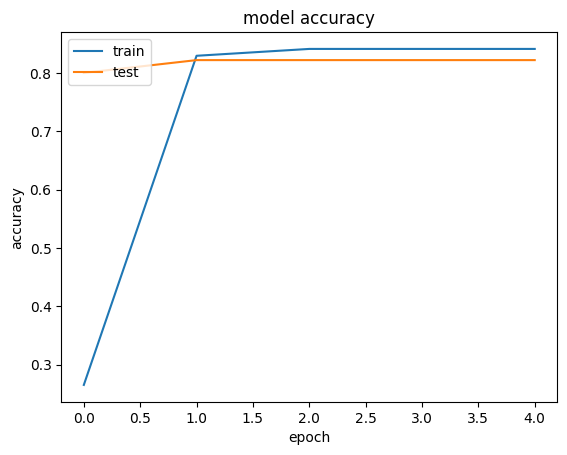

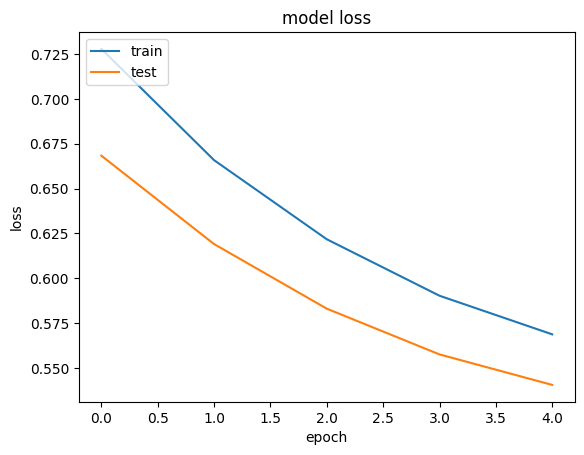

In [32]:
plt.plot(history.history['dense_1_acc'])
plt.plot(history.history['val_dense_1_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['dense_1_loss'])
plt.plot(history.history['val_dense_1_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()